In [2]:
import numpy as np
import pandas as pd
from obspy import read
from obspy.signal.trigger import classic_sta_lta, trigger_onset
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os


lunar_cat_directory = './space_apps_2024_seismic_detection/data/lunar/training/catalogs/'
lunar_cat_file = lunar_cat_directory + 'apollo12_catalog_GradeA_final.csv'
lunar_cat = pd.read_csv(lunar_cat_file)

# load data directories
lunar_training_data_directory = './space_apps_2024_seismic_detection/data/lunar/training/data/S12_GradeA/'
mars_training_data_directory = './space_apps_2024_seismic_detection/data/mars/training/data'


lunar_training_file = lunar_training_data_directory + lunar_cat['filename'][0] + '.csv'

l_training_df = pd.read_csv(lunar_training_file)



In [3]:
def sta_lta(df, sta, lta, thr_on, thr_off):
    velocity = df["velocity(m/s)"]
    rel_time = np.array(df["time_rel(sec)"])
    samp_rate = 1/(rel_time[1] - rel_time[0])

    cft = classic_sta_lta(velocity, int(sta * samp_rate), int(lta * samp_rate))
    on_off = np.array(trigger_onset(cft, thr_on, thr_off))

    # fig, ax = plt.subplots(1, 1, figsize=(12, 3))
    # ax.plot(rel_time,cft)
    # ax.set_xlim([min(rel_time),max(rel_time)])
    # ax.set_xlabel('Time (s)')
    # ax.set_ylabel('Characteristic function')


    times = []
    fig,ax = plt.subplots(1,1,figsize=(12,3))
    for i in np.arange(0, len(on_off)):
        trigger = on_off[i]
        abs_time = l_training_df["time_abs(%Y-%m-%dT%H:%M:%S.%f)"][trigger[0]]
        times.append((abs_time, rel_time[trigger[0]]))
        ax.axvline(x = rel_time[trigger[0]], color='red', label='Trig. On')
        ax.axvline(x = rel_time[trigger[1]], color='purple', label='Trig. Off')

    ax.plot(rel_time, velocity)
    ax.set_xlim([min(rel_time),max(rel_time)])
    ax.legend()   

    return times
    


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]

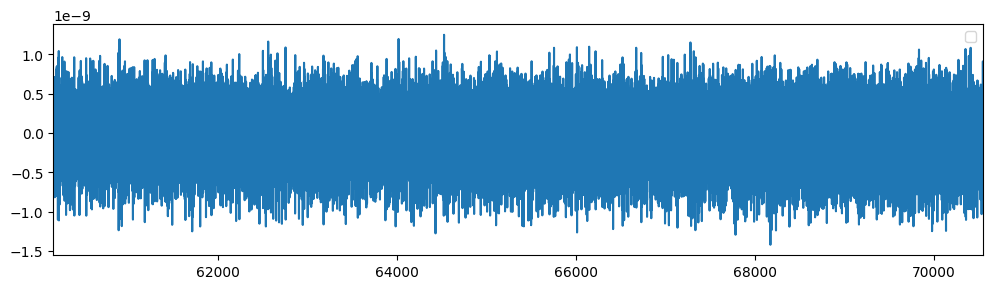

In [6]:
sta_len, lta_len = 1500, 10000
on, off = 2, 1
num_files = len(lunar_cat)


lunar_training_file = lunar_training_data_directory + lunar_cat['filename'][1] + '.csv'
l_training_df = pd.read_csv('sliced4.csv')
    
sta_lta(l_training_df, sta_len, lta_len, on, off)

FileNotFoundError: [Errno 2] No such file or directory: './space_apps_2024_seismic_detection/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1971-04-13HR00_evid00029.csv'

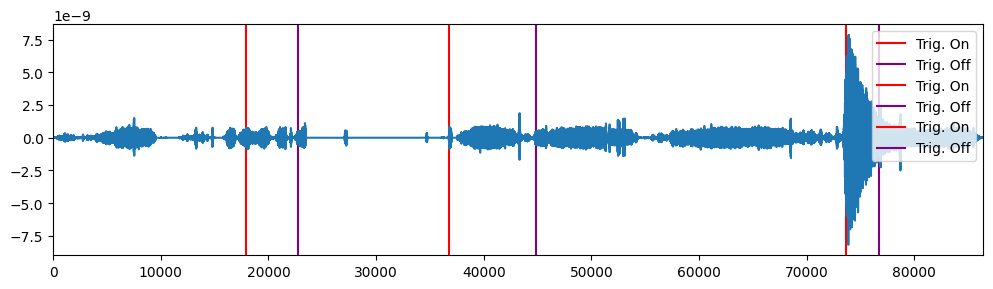

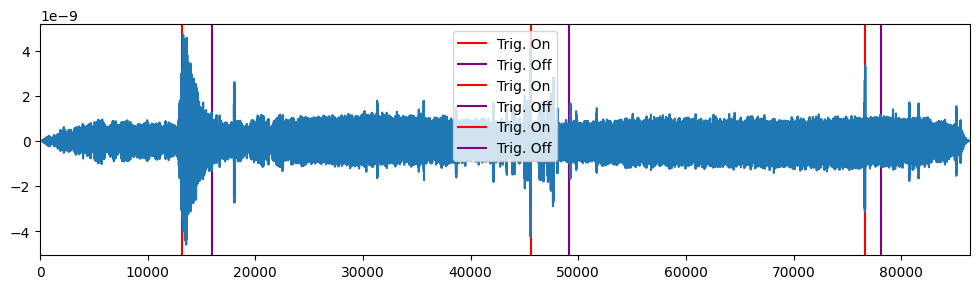

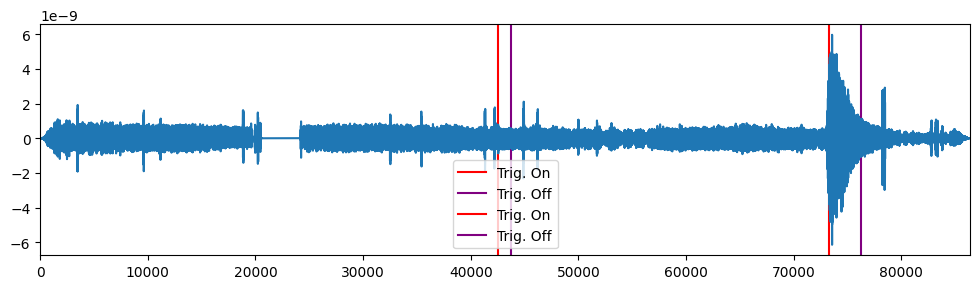

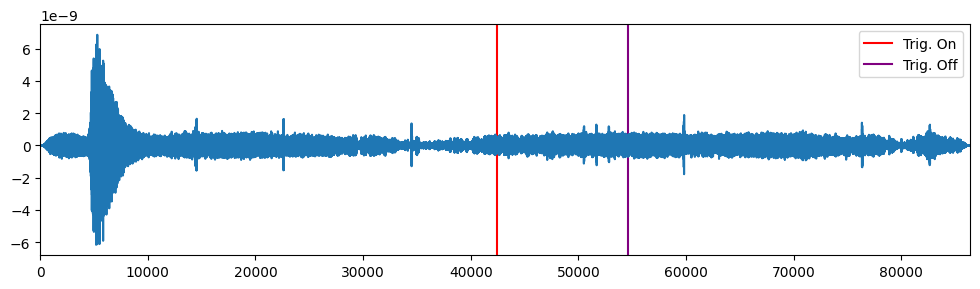

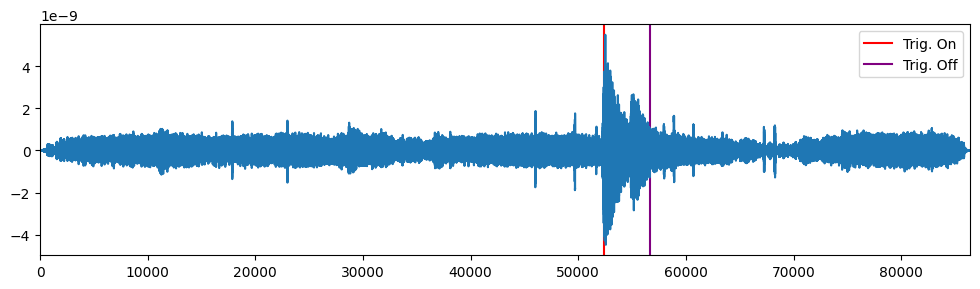

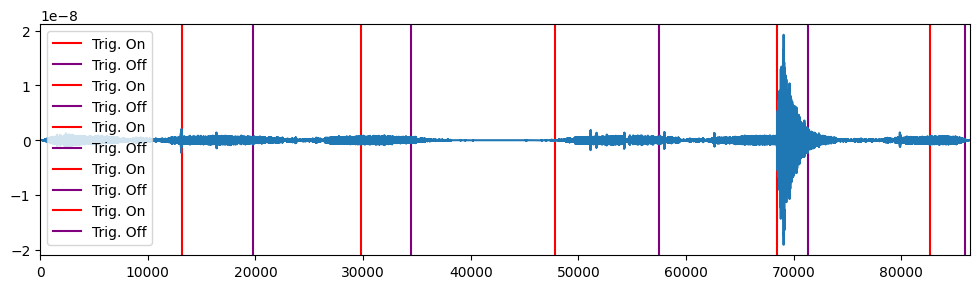

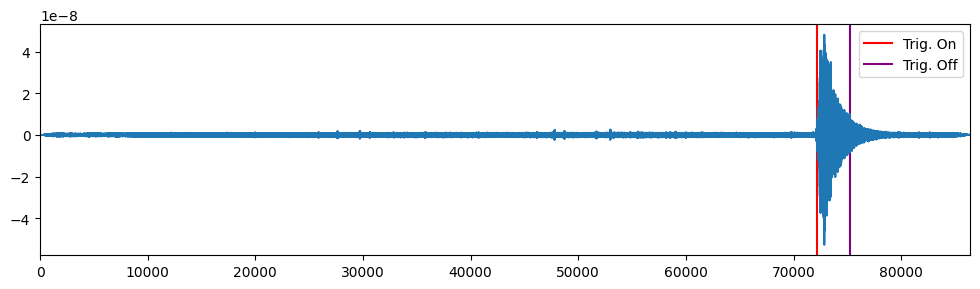

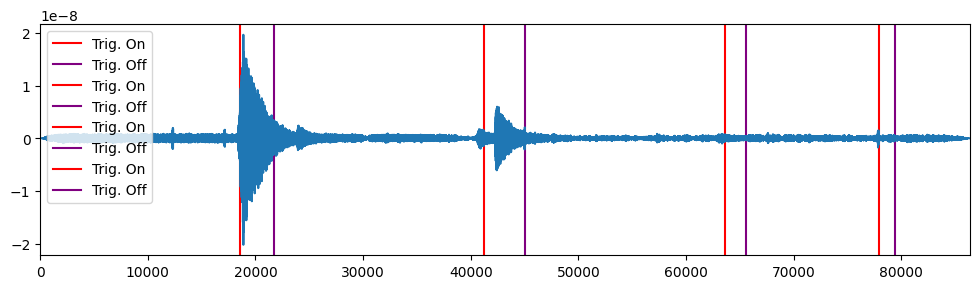

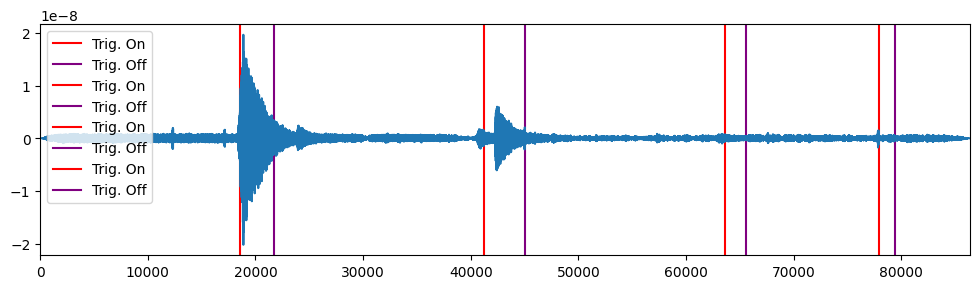

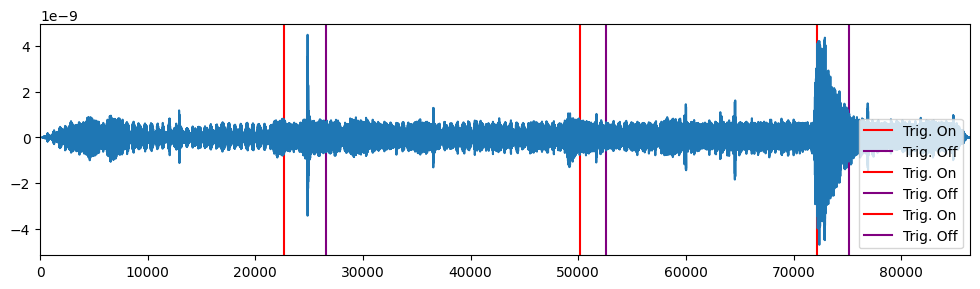

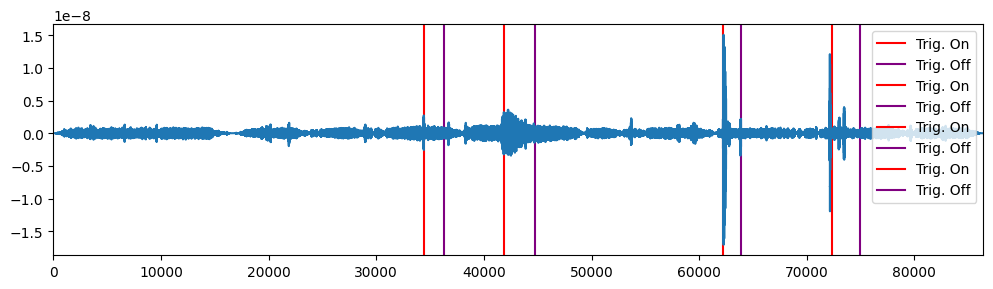

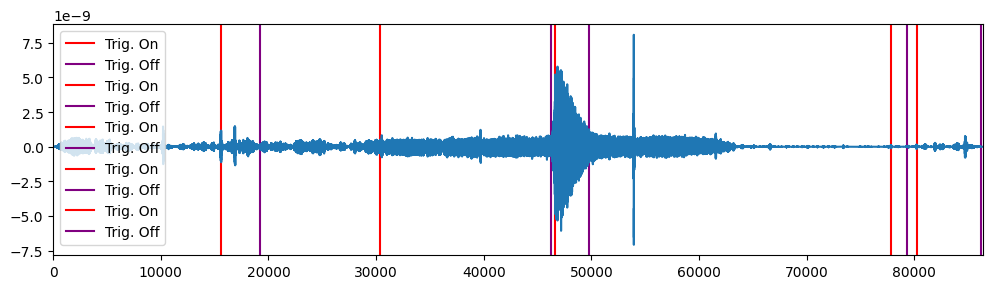

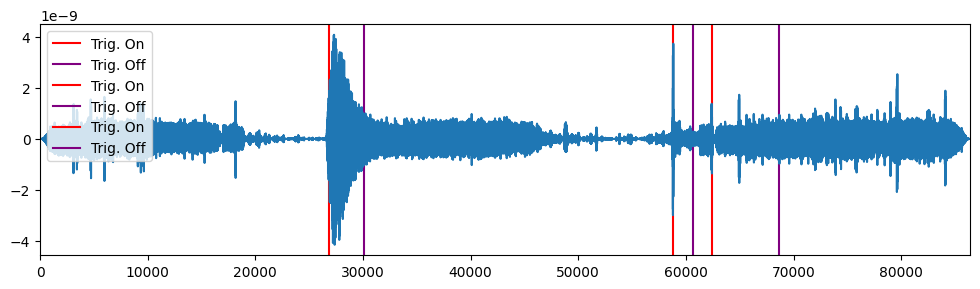

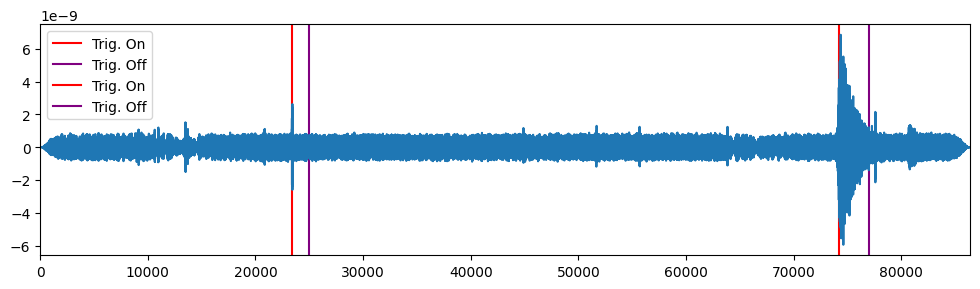

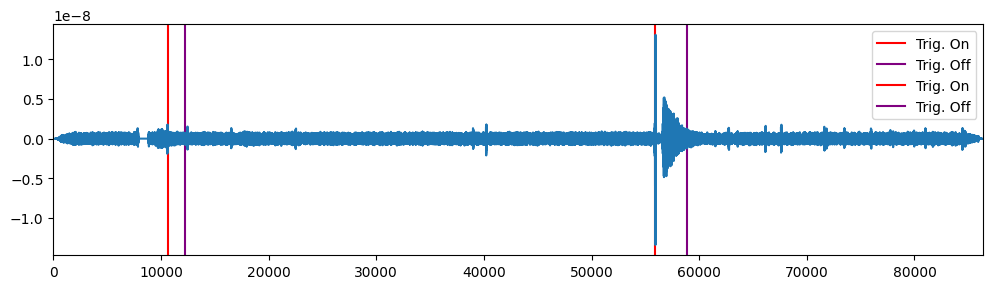

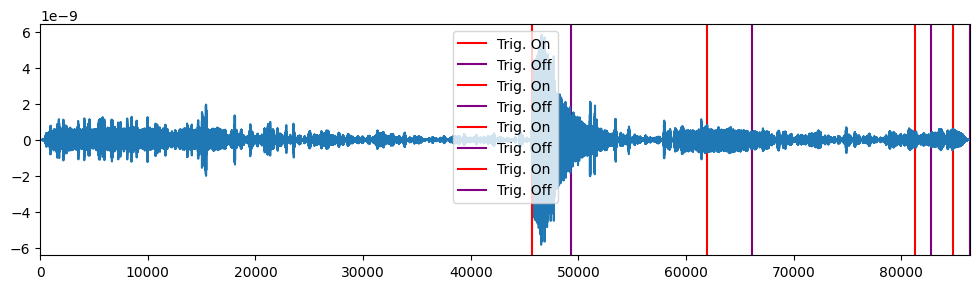

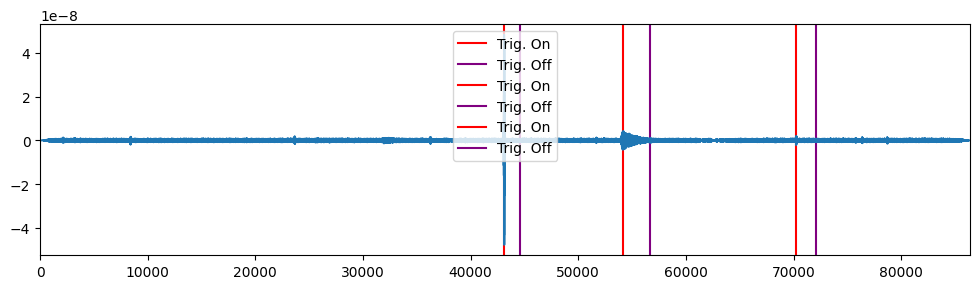

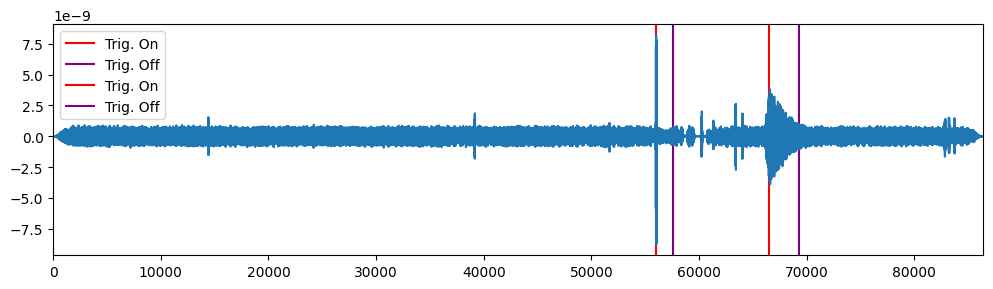

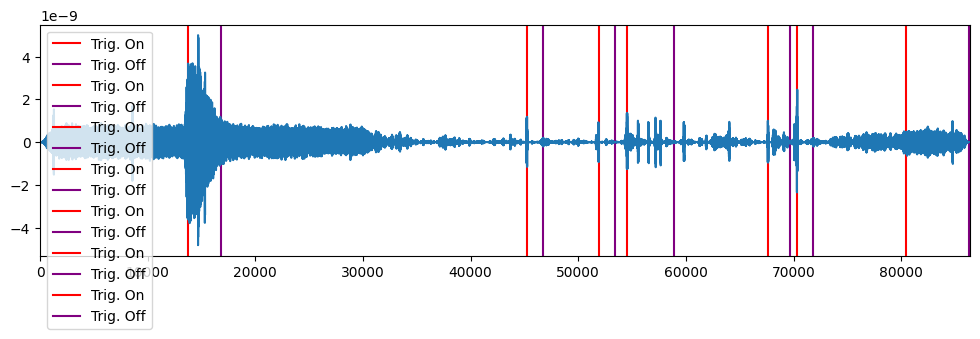

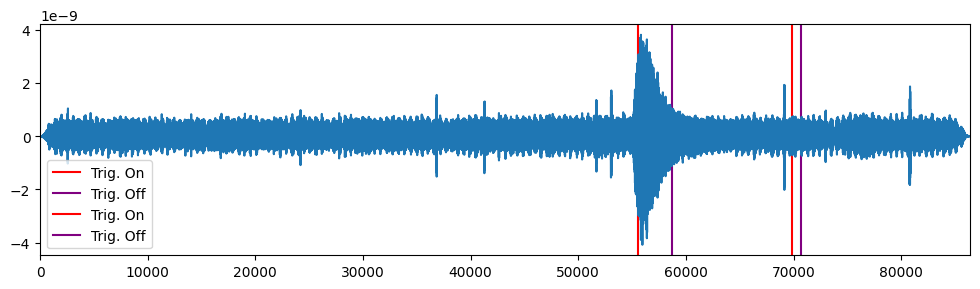

In [5]:
sta_len, lta_len = 1500, 10000
on, off = 2, 1
num_files = len(lunar_cat)


for i in range(num_files):
    lunar_training_file = lunar_training_data_directory + lunar_cat['filename'][i] + '.csv'
    l_training_df = pd.read_csv(lunar_training_file)
    sta_lta(l_training_df, sta_len, lta_len, on, off)